# **Import Libraries and modules**

**Model 1:**

*   Number of Parameters : 1533
*   Accuracy : 97.46%

**Model 2:**

*   Number of Parameters : 4370
*   Accuracy : 98.50%

**Model 3:**

*   Number of Parameters : 2834
*   Accuracy : 98.60%

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


(60000, 28, 28)


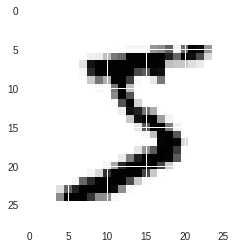

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [110]:
## MODEL - 1

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(12, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(3, 3, 3, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [111]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 13, 13, 12)        396       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 6, 6, 12)          0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 3)           327       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 1, 1, 10)          490       
_________________________________________________________________
flatten_15 (Flatten)         (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [113]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.4038 - acc: 0.8767
Epoch 2/10
10656/60000 [====>.........................] - ETA: 37s - loss: 0.1759 - acc: 0.9458

60000/60000 [==============================] - 46s 770us/step - loss: 0.1585 - acc: 0.9516
Epoch 3/10
18048/60000 [========>.....................] - ETA: 40s - loss: 0.1318 - acc: 0.9596

60000/60000 [==============================] - 53s 876us/step - loss: 0.1334 - acc: 0.9591
Epoch 4/10
22880/60000 [==========>...................] - ETA: 28s - loss: 0.1212 - acc: 0.9625

60000/60000 [==============================] - 46s 770us/step - loss: 0.1194 - acc: 0.9634
Epoch 5/10
25248/60000 [===========>..................] - ETA: 27s - loss: 0.1091 - acc: 0.9670

60000/60000 [==============================] - 46s 762us/step - loss: 0.1105 - acc: 0.9662
Epoch 6/10
27200/60000 [============>.................] - ETA: 24s - loss: 0.1019 - acc: 0.9689

60000/60000 [==============================] - 45s 757us/step - loss: 0.1026 - acc: 0.9685
Epoch 7/10
28736/60000 [=============>................] - ETA: 23s - loss: 0.0975 - acc: 0.9698

60000/60000 [==============================] - 45s 743us/step - loss: 0.0977 - acc: 0.9696
Epoch 8/10
29216/60000 [=============>................] - ETA: 23s - loss: 0.0956 - acc: 0.9706

60000/60000 [==============================] - 45s 745us/step - loss: 0.0925 - acc: 0.9717
Epoch 9/10
29248/60000 [=============>................] - ETA: 23s - loss: 0.0877 - acc: 0.9729

60000/60000 [==============================] - 46s 771us/step - loss: 0.0889 - acc: 0.9718
Epoch 10/10
28096/60000 [=============>................] - ETA: 24s - loss: 0.0853 - acc: 0.9726

60000/60000 [==============================] - 47s 787us/step - loss: 0.0844 - acc: 0.9733


In [114]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.07810063503249548, 0.9746]


In [115]:
## MODEL - 2

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 6, 6))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 13, 13, 10)        330       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 10)          0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 6, 6, 10)          110       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 1, 1, 10)          3610      
_________________________________________________________________
flatten_16 (Flatten)         (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`
  # Remove the CWD from sys.path while we load stuff.


In [116]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 49s 823us/step - loss: 0.3538 - acc: 0.8928
Epoch 2/10
 9120/60000 [===>..........................] - ETA: 41s - loss: 0.1301 - acc: 0.9604

60000/60000 [==============================] - 49s 824us/step - loss: 0.1172 - acc: 0.9643
Epoch 3/10
17664/60000 [=======>......................] - ETA: 32s - loss: 0.0948 - acc: 0.9715

60000/60000 [==============================] - 48s 792us/step - loss: 0.0940 - acc: 0.9713
Epoch 4/10
18752/60000 [========>.....................] - ETA: 42s - loss: 0.0834 - acc: 0.9755

60000/60000 [==============================] - 54s 902us/step - loss: 0.0785 - acc: 0.9755
Epoch 5/10
22816/60000 [==========>...................] - ETA: 28s - loss: 0.0712 - acc: 0.9787

60000/60000 [==============================] - 47s 779us/step - loss: 0.0683 - acc: 0.9790
Epoch 6/10
25056/60000 [===========>..................] - ETA: 26s - loss: 0.0610 - acc: 0.9812

60000/60000 [==============================] - 47s 780us/step - loss: 0.0615 - acc: 0.9811
Epoch 7/10
25280/60000 [===========>..................] - ETA: 26s - loss: 0.0558 - acc: 0.9830

60000/60000 [==============================] - 46s 773us/step - loss: 0.0550 - acc: 0.9835
Epoch 8/10
26944/60000 [============>.................] - ETA: 25s - loss: 0.0482 - acc: 0.9852

60000/60000 [==============================] - 46s 768us/step - loss: 0.0511 - acc: 0.9838
Epoch 9/10
27232/60000 [============>.................] - ETA: 25s - loss: 0.0474 - acc: 0.9854

60000/60000 [==============================] - 46s 764us/step - loss: 0.0479 - acc: 0.9853
Epoch 10/10
28224/60000 [=============>................] - ETA: 23s - loss: 0.0434 - acc: 0.9869

60000/60000 [==============================] - 45s 753us/step - loss: 0.0450 - acc: 0.9863


In [117]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

[0.04824011834450066, 0.985]


In [10]:
## MODEL - 3

from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(12, 7, 7, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 1, 1, activation='relu'))
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 12)        600       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 8)           872       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           72        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 10)          1290      
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
			 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)


/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.3323 - acc: 0.8959
Epoch 2/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.1071 - acc: 0.9669
Epoch 3/10
10912/60000 [====>.........................] - ETA: 12s - loss: 0.0864 - acc: 0.9741

60000/60000 [==============================] - 16s 261us/step - loss: 0.0851 - acc: 0.9738
Epoch 4/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0721 - acc: 0.9783
Epoch 5/10
19744/60000 [========>.....................] - ETA: 10s - loss: 0.0658 - acc: 0.9800

60000/60000 [==============================] - 16s 261us/step - loss: 0.0652 - acc: 0.9797
Epoch 6/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0595 - acc: 0.9812
Epoch 7/10
22400/60000 [==========>...................] - ETA: 9s - loss: 0.0561 - acc: 0.9828

60000/60000 [==============================] - 16s 259us/step - loss: 0.0558 - acc: 0.9824
Epoch 8/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0530 - acc: 0.9834
Epoch 9/10
22816/60000 [==========>...................] - ETA: 9s - loss: 0.0481 - acc: 0.9853

60000/60000 [==============================] - 16s 261us/step - loss: 0.0492 - acc: 0.9843
Epoch 10/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0461 - acc: 0.9858


In [13]:
score = model.evaluate(X_test, Y_test, verbose=0)

print(score)

[0.04462951899989275, 0.9862]


In [0]:
y_pred = model.predict(X_test)

In [15]:
print(y_pred[:9])
print(y_test[:9])

[[1.27498732e-08 1.77532897e-07 2.50136727e-05 2.43184368e-05
  1.77886816e-10 2.09030304e-09 1.58364562e-15 9.99947906e-01
  8.99053063e-08 2.48221704e-06]
 [6.79737980e-07 4.91632265e-04 9.99505758e-01 7.29788660e-11
  2.77344250e-12 6.46877300e-12 1.51817437e-06 3.41114706e-11
  3.51823445e-07 4.41324028e-15]
 [3.98575324e-08 9.99956012e-01 2.12526975e-05 8.40779748e-08
  1.62540218e-05 3.95884108e-08 2.31304875e-06 1.11318366e-06
  2.92125287e-06 3.19207381e-08]
 [9.99346912e-01 3.97810083e-12 2.83947185e-04 3.06062620e-10
  1.01542524e-11 1.44096603e-07 3.68027977e-04 6.92560009e-09
  9.91285219e-07 1.23795116e-08]
 [1.81682225e-08 2.03864481e-08 8.69667474e-07 8.09497858e-10
  9.99959469e-01 3.90033034e-10 4.73924935e-08 3.86018995e-09
  1.88862614e-07 3.93486953e-05]
 [7.45155404e-09 9.99973893e-01 6.19118964e-06 2.33521682e-08
  1.47949477e-05 4.66579275e-10 2.94331013e-08 4.05420997e-06
  9.13683891e-07 1.38544848e-07]
 [3.00605851e-12 1.99132927e-07 4.10626313e-07 9.72892766e

In [16]:
from google.colab import files
uploaded = files.upload()

Saving 8.jpg to 8.jpg


In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
import cv2 
from cv2 import *
im_gray = cv2.imread('8.jpg', cv2.IMREAD_GRAYSCALE)
im_gray =  cv2.bitwise_not(im_gray)

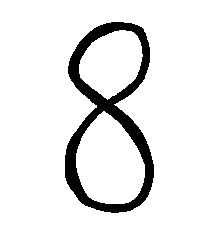

In [24]:
from matplotlib import pyplot as plt
from skimage import io

(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(im_bw)

plt.axis("off")
plt.show()

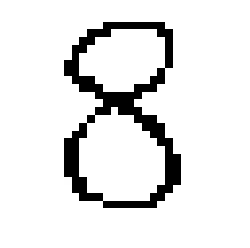

In [25]:
im_pred = cv2.resize(im_bw,(28,28), interpolation = cv2.INTER_CUBIC)
plt.imshow(im_pred)

plt.axis("off")
plt.show()

In [26]:
X_test = im_pred
#print(X_test)

X_test = X_test.reshape(1, 28, 28,1)
X_test = X_test.astype('float32')
X_test /= 255
#print(X_test)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255   0   0   0   0   0   0 255
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0   0
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   0   0   0
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0   0   0   0   0   0   

In [27]:
y_pred = model.predict(X_test)
print(y_pred)
print("The number is %d" %np.argmax(y_pred))

[[5.8808423e-11 2.4021369e-06 5.1171408e-04 1.0966088e-03 4.2165662e-04
  1.3674473e-03 5.3494620e-08 9.0088383e-07 9.9658406e-01 1.5051076e-05]]
The number is 8
